<a href="https://colab.research.google.com/github/rjrockzz/sensor-data-correlation/blob/master/Daily%20Update/har3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install pandas==0.20.3
!pip install numba
!pip install umap-learn
!pip install bokeh==0.12.15
!pip install holoviews==1.10.4 
!pip install colorcet
!pip install datashader

     |████████████████████████████████| 24.5MB 165kB/s 
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.20.3 which is incompatible.
ERROR: seaborn 0.10.1 has requirement pandas>=0.22.0, but you'll have pandas 0.20.3 which is incompatible.
ERROR: plotnine 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.20.3 which is incompatible.
ERROR: pandas-datareader 0.8.1 has requirement pandas>=0.21, but you'll have pandas 0.20.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement pandas>=0.25.0, but you'll have pandas 0.20.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.20.3 which is incompatible.
ERROR: featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.20.3 which is incompatible.
ERROR: fbprophet 0.6 has requirement pandas>=0.23.4, but you'll have pandas 0.20.3 which is incompatible.
  Found existing installation: pandas 1.0.3
    Uninsta

     |████████████████████████████████| 13.6MB 333kB/s 
  Created wheel for bokeh: filename=bokeh-0.12.15-cp36-none-any.whl size=4939344 sha256=c1b0a1a11d8b4eebc58a2c8bf007c602719c44b716da45cc74010d8ce55dd636
  Stored in directory: /root/.cache/pip/wheels/0a/56/87/e8aaa58b05288bb4004cb11db4d502134552c996c0d84c0704
Successfully built bokeh
  Found existing installation: bokeh 1.4.0
    Uninstalling bokeh-1.4.0:
      Successfully uninstalled bokeh-1.4.0
     |████████████████████████████████| 7.4MB 2.7MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
  Created wheel for holoviews: filename=holoviews-1.10.4-cp36-none-any.whl size=3604619 sha256=08c683f7d21a4f50ddf5f0b85a36fb5078285f0dca2f1c4aa78b5669f3ed4d98
  Stored in directory: /root/.cache/pip/wheels/a4/b0/e3/1cce540190c9fb0d4914d2dc48b01b86df494638716468c2b8
Successfully built holoviews
     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 15.5MB 1.3MB/s 
     |█████████████████████

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from sklearn import metrics
import os

In [2]:
pd.__version__

'0.20.3'

In [0]:
# defining input signals and the labels for activities associated.
input_metrics = ["x_acceleration",
                 "y_acceleration",
                 "z_acceleration",
                 "x_gyro",
                 "y_gyro",
                 "z_gyro",
                 "total_x_acceleration",
                 "total_y_acceleration",
                 "total_z_acceleration"]
labels = ["Walking",
          "Upstairs",
          "Downstairs",
          "Sitting",
          "Standing",
          "Laying"]

dataset_path = "/content/drive/My Drive/UCI HAR Dataset"

In [0]:
Training = dataset_path+"/train"  #70% training data
Testing = dataset_path+"/test"    #30% testing data

In [5]:
#Feature extraction
features = list()
with open(dataset_path + "/features.txt") as feature:
    for x in feature:
        features.append(x.split()[1])
ft_df = pd.DataFrame(features)
ft_df.head()

,0
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z
3,tBodyAcc-std()-X
4,tBodyAcc-std()-Y


In [6]:
ft_df.tail()

,0
556,"angle(tBodyGyroMean,gravityMean)"
557,"angle(tBodyGyroJerkMean,gravityMean)"
558,"angle(X,gravityMean)"
559,"angle(Y,gravityMean)"
560,"angle(Z,gravityMean)"


In [0]:
#Reading Train Data
train_df = pd.read_csv(dataset_path+"/train/X_train.txt",delim_whitespace=1,names = features)
train_df["person_id"] = pd.read_csv(Training+"/subject_train.txt",header = None, squeeze = True)#adding feature = person_id
#squeeze = True will return data in pandas series format
train_df["activity_id"] = pd.read_csv(Training+"/y_train.txt", header = None, squeeze = True)#adding feature = activity_id
activity_id = pd.read_csv(Training+"/y_train.txt", header = None, squeeze = True)
#mapping activity to activity name
label_name = activity_id.map({1: "WALKING",
                           2:"WALKING_UPSTAIRS",
                           3:"WALKING_DOWNSTAIRS",
                           4:"SITTING",
                           5:"STANDING",
                           6:"LYING"})
train_df["activity"] = label_name

In [8]:
train_df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",person_id,activity_id,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [9]:
train_df.shape

(7352, 564)

In [0]:
#Reading Test Data
test_df = pd.read_csv(dataset_path+"/test/X_test.txt",delim_whitespace=1,names = features)
test_df["person_id"] = pd.read_csv(Testing+"/subject_test.txt",header = None, squeeze = True)#adding feature = person_id 
test_df["activity_id"] = pd.read_csv(Testing+"/y_test.txt", header = None, squeeze = True)#adding feature = activity_id
activity_id = pd.read_csv(Testing+"/y_test.txt", header = None, squeeze = True)
label_name = activity_id.map({1: "WALKING",
                           2:"WALKING_UPSTAIRS",
                           3:"WALKING_DOWNSTAIRS",
                           4:"SITTING",
                           5:"STANDING",
                           6:"LYING"})
test_df["activity"] = label_name

In [11]:
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",person_id,activity_id,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [12]:
test_df.shape

(2947, 564)

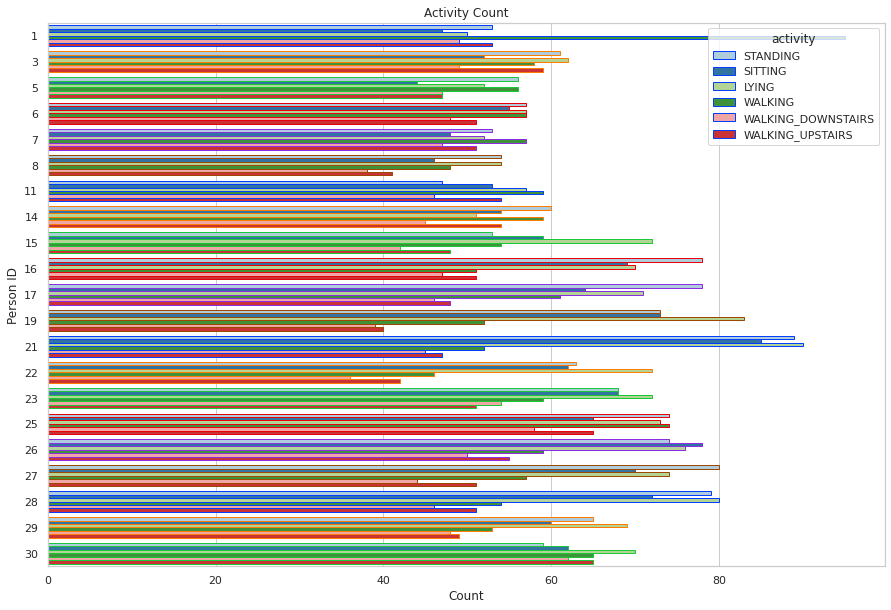

In [13]:
#Checking for any imbalance in the data
import seaborn as sns
sns.set(style="white", palette="Paired", color_codes=True)
sns.set_style("whitegrid") 
fig = plt.figure(figsize=(15,10))
sns.countplot(y="person_id",hue="activity",
              data=train_df,
              edgecolor=sns.color_palette("bright", 6)).set_title("Activity Count")
plt.ylabel("Person ID")
plt.xlabel("Count")
plt.show()

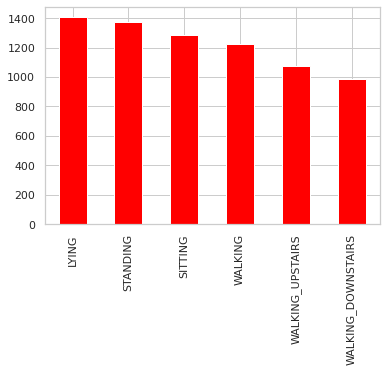

In [14]:
color = train_df["activity_id"].map({1: 'g', 2: 'b', 3: 'y', 4: 'k', 5: 'r', 6: 'g'})
train_df['activity'].value_counts().plot.bar(rot=90,stacked = True, color=color)

In [15]:
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'person_id',
       'activity_id', 'activity'],
      dtype='object', length=564)

In [16]:
#Feature name changed
columns = train_df.columns
for r in (("[()]", ''), ("-", ''), (",",'')):
    columns = columns.str.replace(*r)
#earlier columns was of type panda Index. Now by writing columns.str it has been changed to pandas string.
#pandas string has a method called replace which we have used here.    
train_df.columns = columns
train_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'person_id', 'activity_id', 'activity'],
      dtype='object', length=564)

In [17]:
train_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'person_id', 'activity_id', 'activity'],
      dtype='object', length=564)

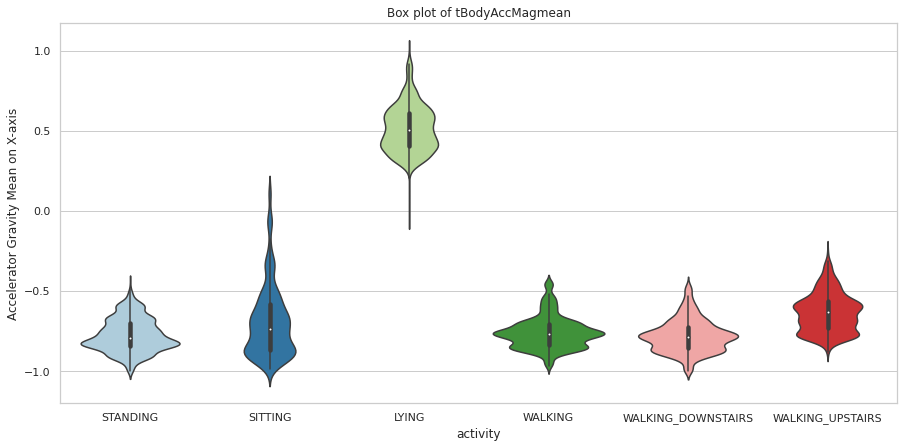

In [18]:
#boxplot of the feature acceleration gravity mean on x-axis
plt.figure(figsize = (15, 7))
sns.violinplot(x = "activity", y = "angleXgravityMean", showfliers = True, data = train_df)
plt.title("Box plot of tBodyAccMagmean")
plt.ylabel("Accelerator Gravity Mean on X-axis")
plt.show()

**Dimensionality Reduction using Uniform Manifold Approximation and Projection**<br>
[UMAP](https://umap-learn.readthedocs.io/en/latest/) Dimensionality Reduction technology used for visualizing as well as  non-linear dimension reduction. The algorithm is founded on three assumptions about the data


1.   The data is uniformly distributed on Riemannian manifold
2.   The Riemannian metric is locally constant (or can be approximated as such).
3.   The manifold is locally connected. 


From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.

 UMAP overall follows the philosophy of tSNE, but introduces a number of improvements such as another cost function and the absence of normalization of high- and low-dimensional probabilities.

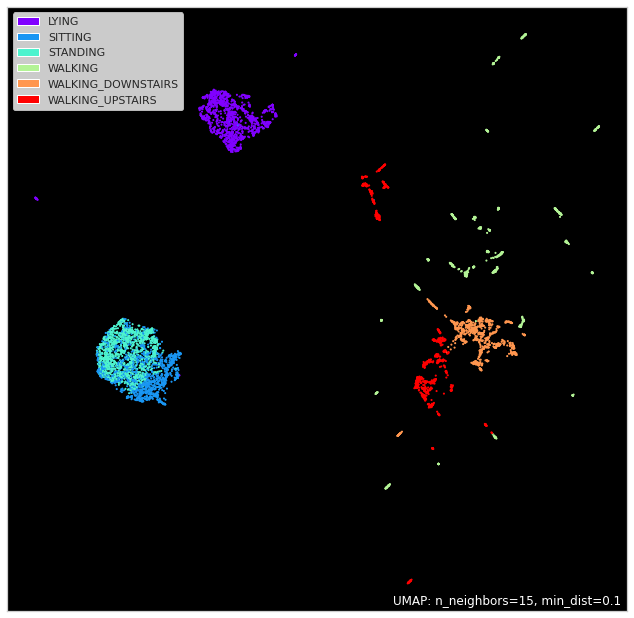

In [19]:
import colorcet
import holoviews
import bokeh
import datashader
import umap
import umap.plot
data = train_df.drop(["person_id", "activity_id", "activity"], axis = 1)
data_label = train_df["activity"]
mapper = umap.UMAP().fit(data)
umap.plot.points(mapper, labels=data_label,theme = 'fire')

**Observations from the UMAP Plot**


The technique can be fairly used to seperate every activity except ***SITTING*** and ***STANDING*** as denoted in the plot.